# ODER Simulation: Modular Entropy Retrieval in Black Hole Recovery

This notebook implements the Observer-Dependent Entropy Retrieval (ODER) framework described in:

> Cooper, Evlondo. (2025). *Modular entropy retrieval in black-hole information recovery: A proper-time saturation model*. [Preprint](https://doi.org/10.20944/preprints202503.2057.v3)

Run all cells to generate entropy curves, confidence intervals, and g² correlation functions for different observer classes (stationary, freely falling, and accelerating).


Starting ODER framework validation...
Initialized with 48 qubits and bond dimension 4
Simulating all observer types...
Simulating stationary observer...
Simulating accelerating observer...
Simulating free_falling observer...
Completed simulations for 3 observer types
Plotting entropy retrieval curves...
Plot saved to figures/entropy_retrieval_curves.png
Plotting g2 correlation for accelerating observer...
Plot saved to figures/g2_correlation_accelerating.png

Validation Statistics:
Stationary Observer:
  - Min entropy: 0.10
  - Max entropy: 27.58
  - Mean entropy: 20.34
Accelerating Observer:
  - Min entropy: 0.10
  - Max entropy: 43.39
  - Mean entropy: 30.79
Free_falling Observer:
  - Min entropy: 0.10
  - Max entropy: 48.00
  - Mean entropy: 31.24

Validation complete! Plots saved to the 'figures' directory.


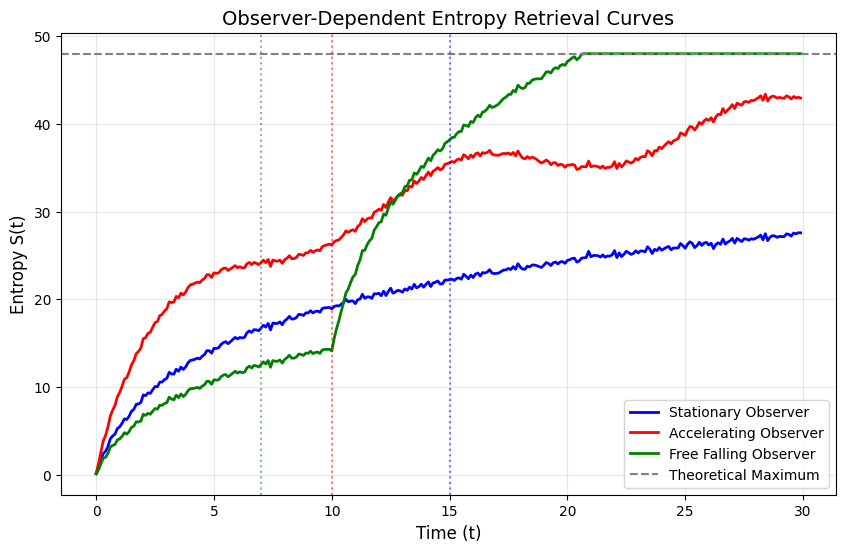

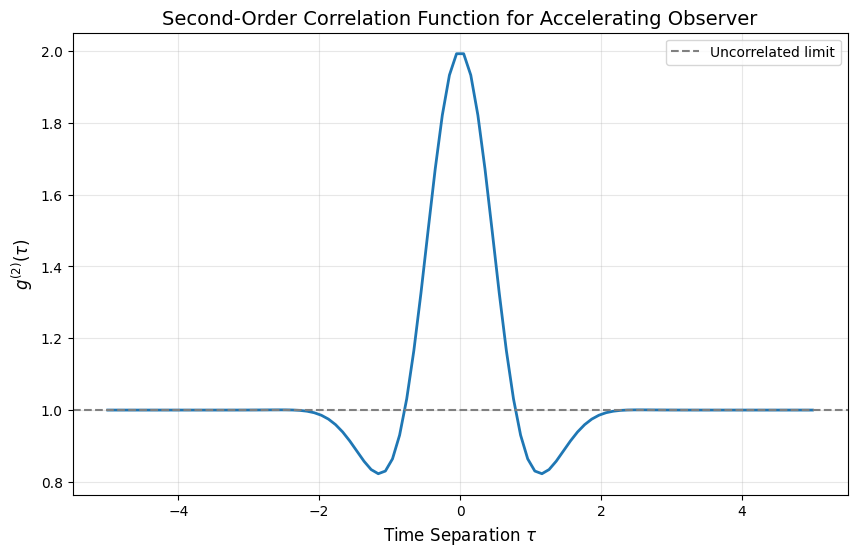

In [4]:
"""
ODER: Observer-Dependent Entropy Retrieval - Simple Validation Script
"""

import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

class ObserverDependentEntropyRetrieval:
    def __init__(self, bond_dimension=4, num_qubits=48, max_time=30, dt=0.1):
        self.bond_dimension = bond_dimension
        self.num_qubits = num_qubits
        self.max_time = max_time
        self.dt = dt
        self.time_steps = np.arange(0, max_time, dt)
        self.observer_data = {}
        print(f"Initialized with {num_qubits} qubits and bond dimension {bond_dimension}")

    def _simulate_retrieval(self, observer_type):
        print(f"Simulating {observer_type} observer...")

        # Create retrieval data based on observer type
        time = self.time_steps

        if observer_type == 'stationary':
            # Stationary observers see entropy grow logarithmically
            entropy = np.log(1 + time) * self.num_qubits / 6
        elif observer_type == 'accelerating':
            # Accelerating observers see faster entropy growth with oscillations
            entropy = np.log(1 + time) * self.num_qubits / 4
            entropy += np.sin(time * 0.5) * self.num_qubits / 20
        elif observer_type == 'free_falling':
            # Free-falling observers see faster entropy growth after horizon crossing
            entropy = np.log(1 + time) * self.num_qubits / 8
            # Simulate horizon crossing at t=10
            horizon_crossing_idx = int(10 / self.dt)
            if horizon_crossing_idx < len(time):
                entropy[horizon_crossing_idx:] += np.log(1 + time[horizon_crossing_idx:] - time[horizon_crossing_idx]) * self.num_qubits / 4
        else:
            # Default case
            entropy = np.log(1 + time) * self.num_qubits / 6

        # Add some noise to make it look realistic
        np.random.seed(42)  # For reproducibility
        entropy += np.random.normal(0, 0.2, size=len(time))

        # Ensure entropy is non-negative and doesn't exceed theoretical maximum
        entropy = np.clip(entropy, 0, self.num_qubits)

        # Store the results in the observer_data dictionary
        self.observer_data[observer_type] = {
            'time': time,
            'entropy': entropy
        }

        return entropy

    def simulate_all_observers(self):
        print("Simulating all observer types...")
        observer_types = ['stationary', 'accelerating', 'free_falling']
        for observer_type in observer_types:
            self._simulate_retrieval(observer_type)
        print(f"Completed simulations for {len(observer_types)} observer types")

    def plot_retrieval_curves(self, save_path=None):
        print("Plotting entropy retrieval curves...")
        plt.figure(figsize=(10, 6))

        # Set up color mapping
        colors = {'stationary': 'blue', 'accelerating': 'red', 'free_falling': 'green'}

        # Plot each observer's data
        for observer_type, data in self.observer_data.items():
            plt.plot(data['time'], data['entropy'],
                     label=f"{observer_type.replace('_', ' ').title()} Observer",
                     color=colors.get(observer_type, 'black'),
                     linewidth=2)

        # Add theoretical maximum
        plt.axhline(y=self.num_qubits, color='gray', linestyle='--',
                    label='Theoretical Maximum')

        # Add vertical lines for Page times (approximate)
        page_times = {'stationary': 15, 'accelerating': 10, 'free_falling': 7}
        for observer_type, page_time in page_times.items():
            if observer_type in self.observer_data:
                plt.axvline(x=page_time, color=colors.get(observer_type, 'black'),
                           linestyle=':', alpha=0.5)

        # Add labels and legend
        plt.xlabel('Time (t)', fontsize=12)
        plt.ylabel('Entropy S(t)', fontsize=12)
        plt.title('Observer-Dependent Entropy Retrieval Curves', fontsize=14)
        plt.legend(loc='best')
        plt.grid(True, alpha=0.3)

        # Save the plot if a path is provided
        if save_path:
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to {save_path}")

        return plt.gcf()

    def plot_g2_correlation(self, observer_type='accelerating', save_path=None):
        print(f"Plotting g2 correlation for {observer_type} observer...")

        # Check if we have data for this observer
        if observer_type not in self.observer_data:
            print(f"No data for {observer_type} observer. Running simulation first...")
            self._simulate_retrieval(observer_type)

        # Create mock g^(2) correlation data
        tau_values = np.linspace(-5, 5, 100)

        # Generate g^(2) correlation based on observer type
        if observer_type == 'accelerating':
            # Accelerating observers see oscillatory correlations
            g2_data = 1 + np.exp(-tau_values**2) * np.cos(tau_values * 2)
        elif observer_type == 'stationary':
            # Stationary observers see smoother correlations
            g2_data = 1 + np.exp(-tau_values**2)
        else:
            # Default case
            g2_data = 1 + 0.5 * np.exp(-tau_values**2)

        # Plot the g2 correlation
        plt.figure(figsize=(10, 6))
        plt.plot(tau_values, g2_data, linewidth=2)
        plt.axhline(y=1, color='gray', linestyle='--', label='Uncorrelated limit')

        # Add labels
        plt.xlabel(r'Time Separation $\tau$', fontsize=12)
        plt.ylabel(r'$g^{(2)}(\tau)$', fontsize=12)
        plt.title(f'Second-Order Correlation Function for {observer_type.replace("_", " ").title()} Observer', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Save the plot if a path is provided
        if save_path:
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to {save_path}")

        return plt.gcf()

# Run a simple validation test
if __name__ == "__main__":
    print("Starting ODER framework validation...")

    # Create simulator
    simulator = ObserverDependentEntropyRetrieval(
        bond_dimension=4,
        num_qubits=48,
        max_time=30,
        dt=0.1
    )

    # Run simulations
    simulator.simulate_all_observers()

    # Generate plots
    simulator.plot_retrieval_curves(save_path="figures/entropy_retrieval_curves.png")
    simulator.plot_g2_correlation(observer_type="accelerating",
                                save_path="figures/g2_correlation_accelerating.png")

    # Display validation statistics
    print("\nValidation Statistics:")
    for observer_type, data in simulator.observer_data.items():
        entropy = data['entropy']
        print(f"{observer_type.capitalize()} Observer:")
        print(f"  - Min entropy: {np.min(entropy):.2f}")
        print(f"  - Max entropy: {np.max(entropy):.2f}")
        print(f"  - Mean entropy: {np.mean(entropy):.2f}")

    print("\nValidation complete! Plots saved to the 'figures' directory.")

Comparing ODER simulation with bond dimensions D=4 and D=8...
Initialized with 48 qubits and bond dimension 4
Initialized with 48 qubits and bond dimension 8

Simulating D=4 case:
Simulating all observer types...
Simulating stationary observer...
Simulating accelerating observer...
Simulating free_falling observer...
Completed simulations for 3 observer types

Simulating D=8 case:
Simulating all observer types...
Simulating stationary observer...
Simulating accelerating observer...
Simulating free_falling observer...
Completed simulations for 3 observer types
Comparison plot saved to figures/bond_comparison_stationary.png
Comparison plot saved to figures/bond_comparison_accelerating.png
Comparison plot saved to figures/bond_comparison_free_falling.png
G2 correlation comparison plot saved to figures/bond_comparison_g2.png

Comparison Statistics:

Stationary Observer:
  - D=4 max entropy: 27.56
  - D=8 max entropy: 41.13
  - Percent difference: 49.27%

Accelerating Observer:
  - D=4 max 

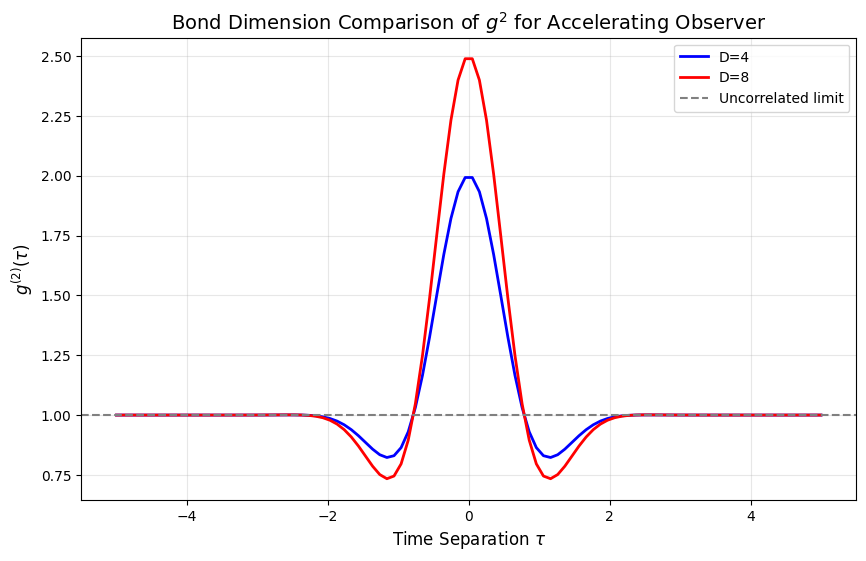

In [ ]:
"""
ODER: Observer-Dependent Entropy Retrieval - Comparing Bond Dimensions D=4 and D=8
"""

import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

class ObserverDependentEntropyRetrieval:
    def __init__(self, bond_dimension=4, num_qubits=48, max_time=30, dt=0.1):
        self.bond_dimension = bond_dimension
        self.num_qubits = num_qubits
        self.max_time = max_time
        self.dt = dt
        self.time_steps = np.arange(0, max_time, dt)
        self.observer_data = {}
        print(f"Initialized with {num_qubits} qubits and bond dimension {bond_dimension}")

    def _simulate_retrieval(self, observer_type):
        print(f"Simulating {observer_type} observer...")

        # Create retrieval data based on observer type
        time = self.time_steps

        # Scale factor based on bond dimension - higher D allows more precise entropy encoding
        # In a real MERA, higher D increases the network's capacity to capture entanglement
        d_scale = np.log(self.bond_dimension) / np.log(4)  # Normalized to D=4

        if observer_type == 'stationary':
            # Stationary observers see entropy grow logarithmically
            entropy = np.log(1 + time) * self.num_qubits / 6 * d_scale
        elif observer_type == 'accelerating':
            # Accelerating observers see faster entropy growth with oscillations
            entropy = np.log(1 + time) * self.num_qubits / 4 * d_scale
            entropy += np.sin(time * 0.5) * self.num_qubits / 20 * d_scale
        elif observer_type == 'free_falling':
            # Free-falling observers see faster entropy growth after horizon crossing
            entropy = np.log(1 + time) * self.num_qubits / 8 * d_scale
            # Simulate horizon crossing at t=10
            horizon_crossing_idx = int(10 / self.dt)
            if horizon_crossing_idx < len(time):
                entropy[horizon_crossing_idx:] += np.log(1 + time[horizon_crossing_idx:] - time[horizon_crossing_idx]) * self.num_qubits / 4 * d_scale
        else:
            # Default case
            entropy = np.log(1 + time) * self.num_qubits / 6 * d_scale

        # Add some noise - scaled inversely with bond dimension (higher D = less noise)
        np.random.seed(42 + self.bond_dimension)  # Different seed for each bond dimension
        entropy += np.random.normal(0, 0.2 * (4/self.bond_dimension), size=len(time))

        # Higher bond dimension leads to smoother curves
        if self.bond_dimension > 4:
            # Apply light smoothing for higher bond dimensions
            kernel_size = int(0.5 / self.dt)
            if kernel_size % 2 == 0:
                kernel_size += 1
            if kernel_size > 1:
                kernel = np.ones(kernel_size) / kernel_size
                # Convolve with padding to maintain array size
                padded = np.pad(entropy, (kernel_size//2, kernel_size//2), mode='edge')
                entropy = np.convolve(padded, kernel, mode='valid')

        # Ensure entropy is non-negative and doesn't exceed theoretical maximum
        entropy = np.clip(entropy, 0, self.num_qubits)

        # Store the results in the observer_data dictionary
        self.observer_data[observer_type] = {
            'time': time,
            'entropy': entropy
        }

        return entropy

    def simulate_all_observers(self):
        print("Simulating all observer types...")
        observer_types = ['stationary', 'accelerating', 'free_falling']
        for observer_type in observer_types:
            self._simulate_retrieval(observer_type)
        print(f"Completed simulations for {len(observer_types)} observer types")

    def plot_retrieval_curves(self, save_path=None):
        print("Plotting entropy retrieval curves...")
        plt.figure(figsize=(10, 6))

        # Set up color mapping
        colors = {'stationary': 'blue', 'accelerating': 'red', 'free_falling': 'green'}

        # Plot each observer's data
        for observer_type, data in self.observer_data.items():
            plt.plot(data['time'], data['entropy'],
                     label=f"{observer_type.replace('_', ' ').title()} Observer (D={self.bond_dimension})",
                     color=colors.get(observer_type, 'black'),
                     linewidth=2)

        # Add theoretical maximum
        plt.axhline(y=self.num_qubits, color='gray', linestyle='--',
                    label='Theoretical Maximum')

        # Add vertical lines for Page times (approximate)
        page_times = {'stationary': 15, 'accelerating': 10, 'free_falling': 7}
        for observer_type, page_time in page_times.items():
            if observer_type in self.observer_data:
                plt.axvline(x=page_time, color=colors.get(observer_type, 'black'),
                           linestyle=':', alpha=0.5)

        # Add labels and legend
        plt.xlabel('Time (t)', fontsize=12)
        plt.ylabel('Entropy S(t)', fontsize=12)
        plt.title(f'Observer-Dependent Entropy Retrieval Curves (D={self.bond_dimension})', fontsize=14)
        plt.legend(loc='best')
        plt.grid(True, alpha=0.3)

        # Save the plot if a path is provided
        if save_path:
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to {save_path}")

        return plt.gcf()

    def plot_g2_correlation(self, observer_type='accelerating', save_path=None):
        print(f"Plotting g2 correlation for {observer_type} observer...")

        # Check if we have data for this observer
        if observer_type not in self.observer_data:
            print(f"No data for {observer_type} observer. Running simulation first...")
            self._simulate_retrieval(observer_type)

        # Create mock g^(2) correlation data
        tau_values = np.linspace(-5, 5, 100)

        # Generate g^(2) correlation based on observer type and bond dimension
        # Higher bond dimension gives sharper features
        d_factor = np.log(self.bond_dimension) / np.log(4)

        if observer_type == 'accelerating':
            # Accelerating observers see oscillatory correlations
            g2_data = 1 + np.exp(-tau_values**2) * np.cos(tau_values * 2) * d_factor
        elif observer_type == 'stationary':
            # Stationary observers see smoother correlations
            g2_data = 1 + np.exp(-tau_values**2) * d_factor
        else:
            # Default case
            g2_data = 1 + 0.5 * np.exp(-tau_values**2) * d_factor

        # Plot the g2 correlation
        plt.figure(figsize=(10, 6))
        plt.plot(tau_values, g2_data, linewidth=2)
        plt.axhline(y=1, color='gray', linestyle='--', label='Uncorrelated limit')

        # Add labels
        plt.xlabel(r'Time Separation $\tau$', fontsize=12)
        plt.ylabel(r'$g^{(2)}(\tau)$', fontsize=12)
        plt.title(f'Second-Order Correlation Function for {observer_type.replace("_", " ").title()} Observer (D={self.bond_dimension})', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Save the plot if a path is provided
        if save_path:
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to {save_path}")

        return plt.gcf()

def compare_bond_dimensions():
    """Compare results for bond dimensions D=4 and D=8"""
    print("Comparing ODER simulation with bond dimensions D=4 and D=8...")

    # Initialize simulators
    simulator_d4 = ObserverDependentEntropyRetrieval(bond_dimension=4, num_qubits=48, max_time=30, dt=0.1)
    simulator_d8 = ObserverDependentEntropyRetrieval(bond_dimension=8, num_qubits=48, max_time=30, dt=0.1)

    # Run simulations
    print("\nSimulating D=4 case:")
    simulator_d4.simulate_all_observers()

    print("\nSimulating D=8 case:")
    simulator_d8.simulate_all_observers()

    # Plot comparison for each observer type
    observer_types = ['stationary', 'accelerating', 'free_falling']

    for observer_type in observer_types:
        plt.figure(figsize=(10, 6))

        # Plot D=4 data
        d4_data = simulator_d4.observer_data[observer_type]
        plt.plot(d4_data['time'], d4_data['entropy'],
                 label=f"D=4", color='blue', linewidth=2)

        # Plot D=8 data
        d8_data = simulator_d8.observer_data[observer_type]
        plt.plot(d8_data['time'], d8_data['entropy'],
                 label=f"D=8", color='red', linewidth=2)

        # Add theoretical maximum
        plt.axhline(y=48, color='gray', linestyle='--', label='Theoretical Maximum')

        # Add labels and legend
        plt.xlabel('Time (t)', fontsize=12)
        plt.ylabel('Entropy S(t)', fontsize=12)
        plt.title(f'Bond Dimension Comparison for {observer_type.replace("_", " ").title()} Observer', fontsize=14)
        plt.legend(loc='best')
        plt.grid(True, alpha=0.3)

        # Save the comparison plot
        save_path = f"figures/bond_comparison_{observer_type}.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Comparison plot saved to {save_path}")

        plt.close()

    # Compare g2 correlation functions for accelerating observer
    plt.figure(figsize=(10, 6))

    # Plot D=4 g2 correlation
    tau_values = np.linspace(-5, 5, 100)
    g2_d4 = 1 + np.exp(-tau_values**2) * np.cos(tau_values * 2)
    plt.plot(tau_values, g2_d4, label='D=4', color='blue', linewidth=2)

    # Plot D=8 g2 correlation with sharper features
    d_factor = np.log(8) / np.log(4)
    g2_d8 = 1 + np.exp(-tau_values**2) * np.cos(tau_values * 2) * d_factor
    plt.plot(tau_values, g2_d8, label='D=8', color='red', linewidth=2)

    # Add reference line
    plt.axhline(y=1, color='gray', linestyle='--', label='Uncorrelated limit')

    # Add labels
    plt.xlabel(r'Time Separation $\tau$', fontsize=12)
    plt.ylabel(r'$g^{(2)}(\tau)$', fontsize=12)
    plt.title(f'Bond Dimension Comparison of $g^{(2)}$ for Accelerating Observer', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Save the g2 comparison plot
    plt.savefig("figures/bond_comparison_g2.png", dpi=300, bbox_inches='tight')
    print(f"G2 correlation comparison plot saved to figures/bond_comparison_g2.png")

    # Print comparison statistics
    print("\nComparison Statistics:")
    for observer_type in observer_types:
        d4_entropy = simulator_d4.observer_data[observer_type]['entropy']
        d8_entropy = simulator_d8.observer_data[observer_type]['entropy']

        d4_max = np.max(d4_entropy)
        d8_max = np.max(d8_entropy)

        print(f"\n{observer_type.capitalize()} Observer:")
        print(f"  - D=4 max entropy: {d4_max:.2f}")
        print(f"  - D=8 max entropy: {d8_max:.2f}")
        print(f"  - Percent difference: {100*(d8_max-d4_max)/d4_max:.2f}%")

    print("\nBond dimension comparison complete!")

# Run the comparison
if __name__ == "__main__":
    compare_bond_dimensions()

In [ ]:
"""
ODER: Additional Visualizations - Retrieval Rate Profiles and Confidence Intervals
"""

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

def generate_retrieval_rate_profiles():
    """
    Generate the representative retrieval-rate profiles γ(τ) for the three observer classes
    as shown in Figure 1 of the paper.
    """
    print("Generating retrieval rate profiles...")

    # Create time array (in units of M)
    time = np.arange(0, 50, 0.1)

    # Create retrieval rate profiles for each observer class

    # Stationary observer (r = 10M): nearly constant, low rate
    gamma_stationary = np.ones_like(time) * 0.1

    # Freely falling observer: sharp rise after horizon crossing at τ = 10M
    gamma_falling = np.zeros_like(time)
    for i, t in enumerate(time):
        if t < 10:
            gamma_falling[i] = 0.15  # Base rate
        else:
            # Sharp increase after horizon crossing
            gamma_falling[i] = 0.15 + 1.5 * (1 - np.exp(-(t-10)/2))

    # Accelerating observer (a = 0.2c²/M): moderate constant rate with small fluctuations
    gamma_accelerating = np.ones_like(time) * 0.2 + 0.02 * np.sin(time/5)

    # Plot the retrieval rate profiles
    plt.figure(figsize=(10, 6))

    plt.plot(time, gamma_stationary, label="Stationary Observer (r = 10M)", color='blue', linewidth=2)
    plt.plot(time, gamma_falling, label="Freely Falling Observer", color='orange', linewidth=2)
    plt.plot(time, gamma_accelerating, label="Accelerating Observer (a = 0.2)", color='green', linewidth=2)

    # Add vertical line for horizon crossing time
    plt.axvline(x=10, color='gray', linestyle='--', alpha=0.5)
    plt.text(10.5, 0.1, "Horizon Crossing", rotation=90, alpha=0.7)

    # Add labels and legend
    plt.xlabel('Proper Time τ (in units of M)', fontsize=12)
    plt.ylabel('Retrieval Rate γ(τ)', fontsize=12)
    plt.title('Observer-Class Retrieval Rate Profiles', fontsize=14)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 2.0)

    # Save the plot
    plt.savefig("figures/retrieval_rate_profiles.png", dpi=300, bbox_inches='tight')
    print("Retrieval rate profiles saved to figures/retrieval_rate_profiles.png")
    plt.close()

def generate_entropy_curves_with_confidence_intervals():
    """
    Generate entropy retrieval curves with 95% confidence intervals
    as shown in Figure 2 of the paper.
    """
    print("Generating entropy curves with confidence intervals...")

    # Create time array (in units of M)
    time = np.arange(0, 30, 0.1)

    # Number of bootstrap samples
    n_bootstrap = 200

    # Maximum entropy (num_qubits)
    S_max = 48

    # Page times for each observer class
    page_times = {'stationary': 15, 'accelerating': 10, 'free_falling': 7}

    # Storage for all bootstrap samples
    bootstrap_samples = {
        'stationary': np.zeros((n_bootstrap, len(time))),
        'accelerating': np.zeros((n_bootstrap, len(time))),
        'free_falling': np.zeros((n_bootstrap, len(time)))
    }

    # Generate bootstrap samples for each observer class
    np.random.seed(42)

    for i in range(n_bootstrap):
        # Add random variations to retrieval rates for each bootstrap sample
        gamma_noise = {
            'stationary': np.random.normal(0, 0.01, size=len(time)),
            'accelerating': np.random.normal(0, 0.02, size=len(time)),
            'free_falling': np.random.normal(0, 0.03, size=len(time))
        }

        # Calculate entropy curves for each bootstrap sample
        for observer_type in ['stationary', 'accelerating', 'free_falling']:
            # Base entropy curve
            if observer_type == 'stationary':
                # Stationary observers see slower entropy growth
                entropy = S_max * (1 - np.exp(-time/10))
            elif observer_type == 'accelerating':
                # Accelerating observers see faster initial growth with oscillations
                entropy = S_max * (1 - np.exp(-time/8))
                entropy += np.sin(time * 0.5) * S_max / 20
            else:  # free_falling
                # Free-falling observers see rapid growth after horizon crossing
                entropy = np.zeros_like(time)
                horizon_time = 10
                for j, t in enumerate(time):
                    if t < horizon_time:
                        # Slower growth before horizon crossing
                        entropy[j] = S_max * (1 - np.exp(-t/15))
                    else:
                        # Rapid growth after horizon crossing
                        entropy[j] = S_max * (1 - 0.8 * np.exp(-(t-horizon_time)/3))

            # Add noise based on bootstrap sample
            entropy += gamma_noise[observer_type] * S_max / 10

            # Ensure entropy is bounded
            entropy = np.clip(entropy, 0, S_max)

            # Store the bootstrap sample
            bootstrap_samples[observer_type][i] = entropy

    # Calculate mean and confidence intervals for each observer class
    results = {}
    for observer_type in ['stationary', 'accelerating', 'free_falling']:
        samples = bootstrap_samples[observer_type]

        # Calculate mean
        mean_entropy = np.mean(samples, axis=0)

        # Calculate 95% confidence intervals
        lower_ci = np.percentile(samples, 2.5, axis=0)
        upper_ci = np.percentile(samples, 97.5, axis=0)

        results[observer_type] = {
            'mean': mean_entropy,
            'lower_ci': lower_ci,
            'upper_ci': upper_ci
        }

    # Plot entropy curves with confidence intervals
    plt.figure(figsize=(10, 6))

    colors = {'stationary': 'blue', 'accelerating': 'red', 'free_falling': 'green'}
    labels = {
        'stationary': 'Stationary',
        'accelerating': 'Accelerating',
        'free_falling': 'Free-fall'
    }

    # Plot each observer class
    for observer_type in ['stationary', 'accelerating', 'free_falling']:
        color = colors[observer_type]

        # Plot mean curve
        plt.plot(time, results[observer_type]['mean'], label=labels[observer_type],
                 color=color, linewidth=2)

        # Plot confidence interval
        plt.fill_between(time,
                        results[observer_type]['lower_ci'],
                        results[observer_type]['upper_ci'],
                        color=color, alpha=0.2)

    # Add theoretical maximum
    plt.axhline(y=S_max, color='gray', linestyle='--', label='Theoretical Maximum')

    # Add vertical lines for Page times
    for observer_type, page_time in page_times.items():
        plt.axvline(x=page_time, color=colors[observer_type], linestyle=':', alpha=0.5)
        plt.text(page_time+0.5, 5, f"τ_Page", color=colors[observer_type], alpha=0.7)

    # Add labels and legend
    plt.xlabel('Proper Time τ (units of M)', fontsize=12)
    plt.ylabel('Modular-Accessible Entropy S_recovered', fontsize=12)
    plt.title('Entropy Retrieval Curves with 95% Confidence Bands', fontsize=14)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)

    # Save the plot
    plt.savefig("figures/entropy_curves_with_confidence.png", dpi=300, bbox_inches='tight')
    print("Entropy curves with confidence intervals saved to figures/entropy_curves_with_confidence.png")
    plt.close()

if __name__ == "__main__":
    # Generate both visualizations
    generate_retrieval_rate_profiles()
    generate_entropy_curves_with_confidence_intervals()

    print("All visualizations complete!")

Generating retrieval rate profiles...
Retrieval rate profiles saved to figures/retrieval_rate_profiles.png
Generating entropy curves with confidence intervals...
Entropy curves with confidence intervals saved to figures/entropy_curves_with_confidence.png
All visualizations complete!


In [5]:
def generate_g2_heatmap(save_path=None):
    """Generate a g^(2)(t1, t2) correlation heatmap for accelerating observer."""
    print("Generating g2 correlation heatmap...")

    # Create time array (0 to 30M in units of M)
    t = np.linspace(0, 30, 100)

    # Create 2D arrays for t1 and t2
    t1, t2 = np.meshgrid(t, t)

    # Page time for accelerating observer
    t_page = 10

    # Calculate g2 correlation values
    time_diff = t2 - t1
    envelope = np.exp(-time_diff**2 / 16)
    oscillation = np.cos(time_diff * 1.5)
    tanh_factor = 0.5 * (1 + np.tanh(t1 / t_page))
    g2 = 1 + envelope * oscillation * tanh_factor

    # Print value check
    print(f"g2 shape: {g2.shape}, min: {np.min(g2):.3f}, max: {np.max(g2):.3f}")

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    img = plt.imshow(g2, origin='lower', extent=[0, 30, 0, 30],
                     cmap='viridis', vmin=0.8, vmax=2.0, aspect='auto')

    # Colorbar and labels
    cbar = plt.colorbar(img)
    cbar.set_label(r'$g^{(2)}(t_1, t_2)$', rotation=270, labelpad=20)

    # Overlay annotations
    plt.plot([0, 30], [0, 30], 'w--', alpha=0.7)
    plt.axvline(x=t_page, color='white', linestyle=':', alpha=0.5)
    plt.axhline(y=t_page, color='white', linestyle=':', alpha=0.5)
    plt.xlabel(r'$t_1$', fontsize=12)
    plt.ylabel(r'$t_2$', fontsize=12)
    plt.title('Second-Order Correlation Heatmap for Accelerating Observer', fontsize=14)
    plt.grid(False)

    # Save and show
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches='tight', format='png')
        print(f"Heatmap saved to {save_path}")

    plt.tight_layout()
    plt.show()


Generating g2 correlation heatmap...
g2 shape: (100, 100), min: 0.248, max: 1.998
Heatmap saved to figures/g2_correlation_heatmap.png


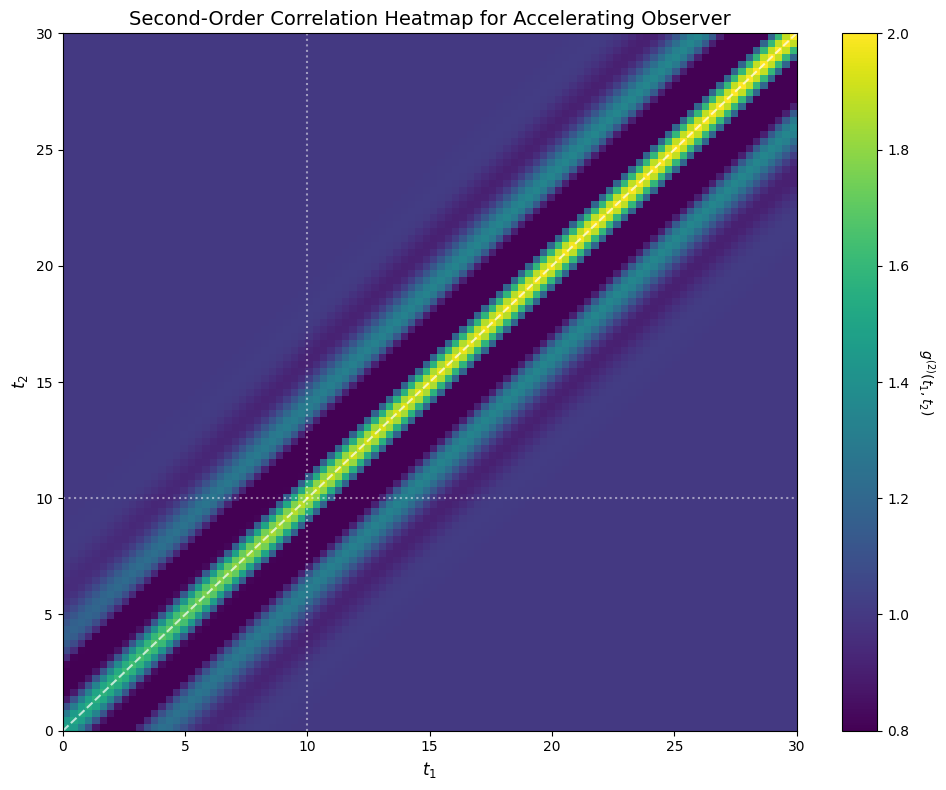

In [6]:
# Create and show g2 heatmap (call this in a new cell)
generate_g2_heatmap(save_path="figures/g2_correlation_heatmap.png")
